<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-News-Articles" data-toc-modified-id="Acquire-News-Articles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire News Articles</a></span></li><li><span><a href="#Prepare-News-Articles" data-toc-modified-id="Prepare-News-Articles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare News Articles</a></span><ul class="toc-item"><li><span><a href="#Extra-Cleaning" data-toc-modified-id="Extra-Cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extra Cleaning</a></span></li></ul></li><li><span><a href="#Explore-Text" data-toc-modified-id="Explore-Text-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Text</a></span><ul class="toc-item"><li><span><a href="#Create-Numeric-Columns-in-df" data-toc-modified-id="Create-Numeric-Columns-in-df-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create Numeric Columns in df</a></span></li></ul></li><li><span><a href="#Identify-Important-Words-in-Text" data-toc-modified-id="Identify-Important-Words-in-Text-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identify Important Words in Text</a></span><ul class="toc-item"><li><span><a href="#Create-and-Visualize-N-grams" data-toc-modified-id="Create-and-Visualize-N-grams-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create and Visualize N-grams</a></span><ul class="toc-item"><li><span><a href="#Create-N-grams-Function" data-toc-modified-id="Create-N-grams-Function-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Create N-grams Function</a></span></li><li><span><a href="#Create-N-Gram-Viz-Functions" data-toc-modified-id="Create-N-Gram-Viz-Functions-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Create N-Gram Viz Functions</a></span></li></ul></li><li><span><a href="#Explore-Words-by-Topic-Label" data-toc-modified-id="Explore-Words-by-Topic-Label-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explore Words by Topic Label</a></span><ul class="toc-item"><li><span><a href="#Explore-Business" data-toc-modified-id="Explore-Business-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Explore Business</a></span></li><li><span><a href="#Explore-Entertainment" data-toc-modified-id="Explore-Entertainment-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Explore Entertainment</a></span></li><li><span><a href="#Explore-Sports" data-toc-modified-id="Explore-Sports-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Explore Sports</a></span></li><li><span><a href="#Explore-Tech" data-toc-modified-id="Explore-Tech-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Explore Tech</a></span></li></ul></li><li><span><a href="#Create-a-Series-of-Word-Frequencies-for-Each-Topic-Label" data-toc-modified-id="Create-a-Series-of-Word-Frequencies-for-Each-Topic-Label-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create a Series of Word Frequencies for Each Topic Label</a></span></li></ul></li><li><span><a href="#Remove-More-Stopwords" data-toc-modified-id="Remove-More-Stopwords-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remove More Stopwords</a></span><ul class="toc-item"><li><span><a href="#Create-df-of-Word-Frequencies-for-Each-Subset-Above" data-toc-modified-id="Create-df-of-Word-Frequencies-for-Each-Subset-Above-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create df of Word Frequencies for Each Subset Above</a></span></li><li><span><a href="#Search-for-Topic-specific-Words" data-toc-modified-id="Search-for-Topic-specific-Words-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Search for Topic-specific Words</a></span></li><li><span><a href="#Word-Clouds!" data-toc-modified-id="Word-Clouds!-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Word Clouds!</a></span></li></ul></li></ul></div>

In [74]:
import pandas as pd
import numpy as np

import os
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from wordcloud import WordCloud

from acquire_walkthrough import get_news_articles
from prepare_walkthrough import prep_article_data

## Acquire News Articles

In [75]:
df = get_news_articles()

## Prepare News Articles

I'm going to use my cleaned, lemmatized text with minimal stopwords removed to start; that is how my `prep_article_data` will deliver my text to me here. As I explore, I will probably be adding stopwords and removing tokens that are just noise as I come across them.

In [76]:
df = prep_article_data(df)

In [77]:
df.head()

,topic,title,author,content,clean_stemmed,clean_lemmatized
0,business,US firm buys Serum Institute parent's Czech un...,Krishna Veera Vanamali,US biotech firm Novavax has announced it's buy...,us biotech firm novavax ha announc buy czech r...,u biotech firm novavax ha announced buying cze...
1,business,"Twitter CEO donates $10M to project giving $1,...",Pragya Swastik,Twitter's billionaire CEO Jack Dorsey has dona...,twitter billionair ceo jack dorsey ha donat 10...,twitter billionaire ceo jack dorsey ha donated...
2,business,Google in talks to buy 5% stake in Vodafone Id...,Krishna Veera Vanamali,Google is exploring an investment in Vodafone ...,googl explor invest vodafon idea part us techn...,google exploring investment vodafone idea part...
3,business,Microsoft in talks to buy 2.5% stake in Jio fo...,Anushka Dixit,Microsoft is in talks with Mukesh Ambani-led R...,microsoft talk mukesh ambanil relianc industri...,microsoft talk mukesh ambaniled reliance indus...
4,business,25-year-old Anant Ambani joins $65 billion Jio...,Krishna Veera Vanamali,Asia's richest person Mukesh Ambani's 25-year-...,asia richest person mukesh ambani 25yearold so...,asia richest person mukesh ambanis 25yearold s...


In [78]:
# Select label and text and rename accordingly
df_lem = df[['topic', 'clean_lemmatized']]

df_lem = df_lem.rename(columns={'topic': 'label', 'clean_lemmatized': 'text'})

# df_lem uses lemmatized text
df_lem.head(1)

,label,text
0,business,u biotech firm novavax ha announced buying cze...


### Extra Cleaning

As I explore my text data, I will find more things I want to remove. I know from exploring the text I scraped from inshort articles that there are a lot of numbers that are not useful to me for my purposes of sentiment analysis and creating a machine learning model that can predict the topic, or label, of an article. I'm going to remove numbers from my text here, and as I find more unnecessary tokens, I will return here to remove them.

In [79]:
# replace numbers in my text column with empty strings.

df_lem['text'] = df_lem.text.replace(r'\d', '', regex=True)

In [80]:
df_lem.head()

,label,text
0,business,u biotech firm novavax ha announced buying cze...
1,business,twitter billionaire ceo jack dorsey ha donated...
2,business,google exploring investment vodafone idea part...
3,business,microsoft talk mukesh ambaniled reliance indus...
4,business,asia richest person mukesh ambanis yearold son...


In [81]:
# split my text into lists of words

words = df_lem['text'].str.split()
words.head()

0    [u, biotech, firm, novavax, ha, announced, buy...
1    [twitter, billionaire, ceo, jack, dorsey, ha, ...
2    [google, exploring, investment, vodafone, idea...
3    [microsoft, talk, mukesh, ambaniled, reliance,...
4    [asia, richest, person, mukesh, ambanis, yearo...
Name: text, dtype: object

In [85]:
# remove extra stopwords identified through exploration (without the function), join list into string, reassign to df

extra_stopwords = ['ha', 'wa', 'said', 'u', '']

df_lem['text'] = words.apply(lambda row: [word for word in row if word not in extra_stopwords]).str.join(' ')
df_lem['text'].head()

0    biotech firm novavax announced buying czech re...
1    twitter billionaire ceo jack dorsey donated mi...
2    google exploring investment vodafone idea part...
3    microsoft talk mukesh ambaniled reliance indus...
4    asia richest person mukesh ambanis yearold son...
Name: text, dtype: object

## Explore Text

Our dataframe has 100 rows/observations and 2 columns; `label` is one of four topics, business, entertainment, technology, sports, which is our target, and `text` is a string of tokens/words from each observation or article. Each observation is the text from one article and the topic of the article.

In [86]:
print(f'Our df_lem dataframe has {df_lem.shape[0]} rows and {df_lem.shape[1]} columns')

Our df_lem dataframe has 100 rows and 2 columns


In [87]:
# I only have four possible values for my label column. I'm going to make it a category dtype

df_lem.label.value_counts()

technology       25
business         25
sports           25
entertainment    25
Name: label, dtype: int64

In [88]:
df_lem['label'] = df_lem.label.astype('category')

In [89]:
# Our scraped data is very balanced!

labels = pd.concat([df_lem.label.value_counts(),
                    df_lem.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
technology,25,0.25
sports,25,0.25
entertainment,25,0.25
business,25,0.25


In [90]:
# Take a quick look at my text column values

df_lem.text.head()

0    biotech firm novavax announced buying czech re...
1    twitter billionaire ceo jack dorsey donated mi...
2    google exploring investment vodafone idea part...
3    microsoft talk mukesh ambaniled reliance indus...
4    asia richest person mukesh ambanis yearold son...
Name: text, dtype: object

### Create Numeric Columns in df

In [91]:
# Create a column that gives the length of the text/string for each observation

df_lem['length'] = df_lem.text.apply(len)
df_lem.head()

,label,text,length
0,business,biotech firm novavax announced buying czech re...,274
1,business,twitter billionaire ceo jack dorsey donated mi...,260
2,business,google exploring investment vodafone idea part...,230
3,business,microsoft talk mukesh ambaniled reliance indus...,262
4,business,asia richest person mukesh ambanis yearold son...,245


## Identify Important Words in Text

### Create and Visualize N-grams

In creating my Bag of Words to search my Corpus for the most common uni-, bi-, and trigrams, I see that I have empty strings, single letters, and truncated verbs that will not add meaning to my exploration. I will definitely go back to my 'extra cleaning' section and remove the following stopwords: u, ha, '', wa, said.

In [92]:
# create a list of words from every observation from the text column or entire corpus

words = ' '.join(df_lem.text).split(' ')
words[:10]

['biotech',
 'firm',
 'novavax',
 'announced',
 'buying',
 'czech',
 'republicbased',
 'praha',
 'vaccine',
 'unit']

In [93]:
# create lists of uni-, bi-, and trigrams

unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

In [94]:
# create a dictionary holding the uni-, bi-, and trigrams from our Corpus words list

grams_dict = {'unigrams': unigrams, 'bigrams': bigrams, 'trigrams': trigrams}
grams_dict.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

#### Create N-grams Function

In [95]:
def grab_ngrams(df, col):
    '''
    This function takes in a df and a string name for a column, creates
    a list of words from entire corpus, and
    returns a dictionary holding all uni-, bi-, and trigrams.
    '''
    # create our corpus
    words = ' '.join(df[col]).split(' ')
    
    # create lists of uni-, bi-, and trigrams
    unigrams = list(ngrams(words, 1))
    bigrams = list(ngrams(words, 2))
    trigrams = list(ngrams(words, 3))
    
    # create a dictionary holding the uni-, bi-, and trigrams from our words
    grams_dict = {'unigrams': unigrams, 'bigrams': bigrams, 'trigrams': trigrams}
    
    return grams_dict

In [96]:
ngrams_dict = grab_ngrams(df_lem, 'text')
ngrams_dict.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

#### Create N-Gram Viz Functions

I want to create two functions here. 

- `ngrams_viz(ngrams_dict, topic)` will take in a dictionary of uni-, bi-, and trigrams and a string for topic and display viz for the top 20 most common of each for a single topic.


- `ngrams_compare()` will take in a df with a 'label' column and a 'text' column, 
    an int: 1 for unigrams, 2 for bigrams, 3 for trigrams,
    and a string for color for customization and displays horizontal bar chart
    subplots by topic with the top 20 common uni-, bi-, or trigrams.

In [27]:
def ngrams_viz(ngram_dict, topic):
    '''
    This function takes in a dictionary of uni-, bi-, and trigrams
    and displays viz for the top 20 most common of each.
    '''
    # loop through the key in the dictionary
    for key in ngrams_dict:
        
        # convert value_counts to a Series and plot top 20
        (pd.Series(ngrams_dict[key])
         .value_counts()
         .head(20).plot.barh(color='thistle', width=.9)
        )

        plt.title('20 Most Common ' + topic + ' ' + key)
        
        # reorder y-axis of horizontal bar chart
        plt.gca().invert_yaxis()
        plt.show()

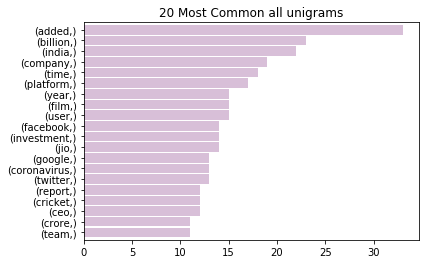

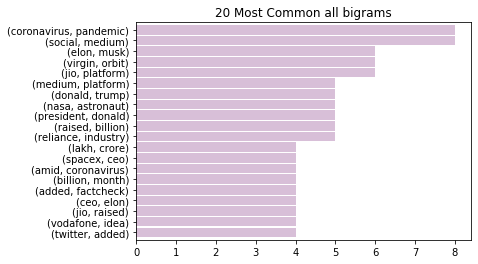

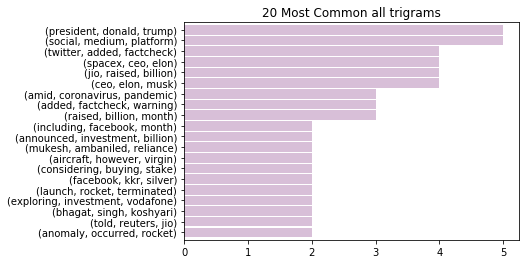

In [32]:
# Visualize the top uni-, bi-, and trigrams for all of our words together

ngrams_viz(ngrams_dict, 'all')

### Explore Words by Topic Label

Here I will create my bag of words or large combined list of all of the tokens/words from our corpus of documents by topic. In our context, that means that we will join all of the text from each row of a column into a long string of tokens/words, and those strings into lists of individual tokens/words. The difference here from the n-grams we explored above is that I will filter the df by topic for each of our four topics.

#### Explore Business

In [33]:
# create subset of df for business

biz_df = df_lem[df_lem.label == 'business']
biz_df.head()

,label,text,length
0,business,biotech firm novavax announced buying czech re...,274
1,business,twitter billionaire ceo jack dorsey donated mi...,260
2,business,google exploring investment vodafone idea part...,230
3,business,microsoft talk mukesh ambaniled reliance indus...,262
4,business,asia richest person mukesh ambanis yearold son...,245


In [34]:
# create dictionary of uni-, bi-, and trigrams for biz

biz_grams = grab_ngrams(biz_df, 'text')
biz_grams.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

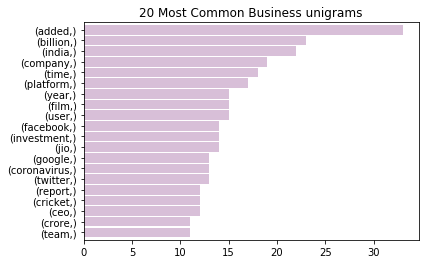

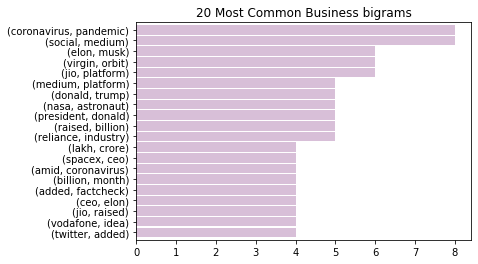

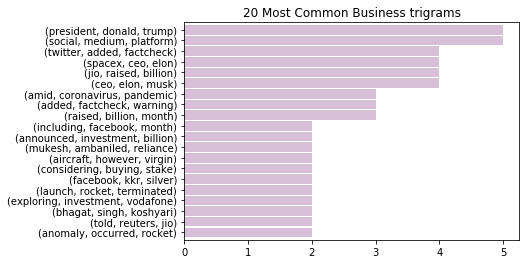

In [35]:
ngrams_viz(biz_grams, 'Business')

#### Explore Entertainment

In [45]:
# create subset of df for entertainment

entertainment_df = df_lem[df_lem.label == 'entertainment']
entertainment_df.head()

,label,text,length
75,entertainment,ip officer ravi mohan saini crore kbc junior y...,219
76,entertainment,actress maanvi gagroo criticised clothing stor...,225
77,entertainment,kannada tv actress mebiena micheal passed away...,240
78,entertainment,actor sonu sood wednesday shared video phone n...,223
79,entertainment,tripura police registered fir bangladeshi sing...,292


In [46]:
# create dictionary of uni-, bi-, and trigrams for entertainment

ent_grams = grab_ngrams(entertainment_df, 'text')
ent_grams.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

#### Explore Sports

In [47]:
# create subset of df for sports

sports_df = df_lem[df_lem.label == 'sports']
sports_df.head()

,label,text,length
25,sports,exindia captain rahul dravid idea creating bio...,208
26,sports,icc cricket committee chairman anil kumble rea...,245
27,sports,cricketerturnedcommentator aakash chopra batsm...,165
28,sports,reacting yuvraj singhs comment suresh raina dh...,218
29,sports,former australia head coach darren lehmann tea...,185


In [48]:
# create dictionary of uni-, bi-, and trigrams for sports

sports_grams = grab_ngrams(sports_df, 'text')
sports_grams.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

#### Explore Tech

In [49]:
# create subset of df for technology

tech_df = df_lem[df_lem.label == 'technology']
tech_df.head()

,label,text,length
50,technology,day twitter factchecked president donald trump...,270
51,technology,twitter ceo jack dorsey defended company decis...,267
52,technology,white house official president donald trump wo...,260
53,technology,pablo escobars brother roberto escobar sued ap...,275
54,technology,microsoft talk mukesh ambaniled reliance indus...,262


In [50]:
# create dictionary of uni-, bi-, and trigrams for tech

tech_grams = grab_ngrams(tech_df, 'text')
tech_grams.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

In [97]:
def ngrams_compare(df, num, color):
    '''
    This function takes in a df with a 'label' column and a 'text' column, 
    an int: 1 for unigrams, 2 for bigrams, 3 for trigrams,
    and a string for color for customization and displays horizontal bar chart
    subplots by topic with the top 20 common uni-, bi-, or trigrams.
    '''
    # create topics list to loop through
    topics = df.label.unique()
    
    # create figure for subplots
    plt.figure(figsize=(16, 12))
    
    # loop through topics
    for i, topic in list(enumerate(topics, start=1)):
        
        # assign subtopic df to temp_df
        temp_df = df[df.label == topic]

        # create a list of words from entire corpus
        words = ' '.join(temp_df['text']).split(' ')

        # create lists of uni-, bi-, and trigrams
        n_grams = list(ngrams(words, num))

        subplot(2,2,i)

        (pd.Series(n_grams)
                .value_counts()
                .head(20)
                .plot.barh(color=color, width=.9, fontsize=15)
        )
        
        # print customized title
        plt.title('20 Most Common ' + topic + ' ' + str(num) + '-grams', fontsize=20)

        # reorder y-axis of horizontal bar chart
        plt.gca().invert_yaxis()
        
    # display settings    
    plt.tight_layout()
    plt.show()

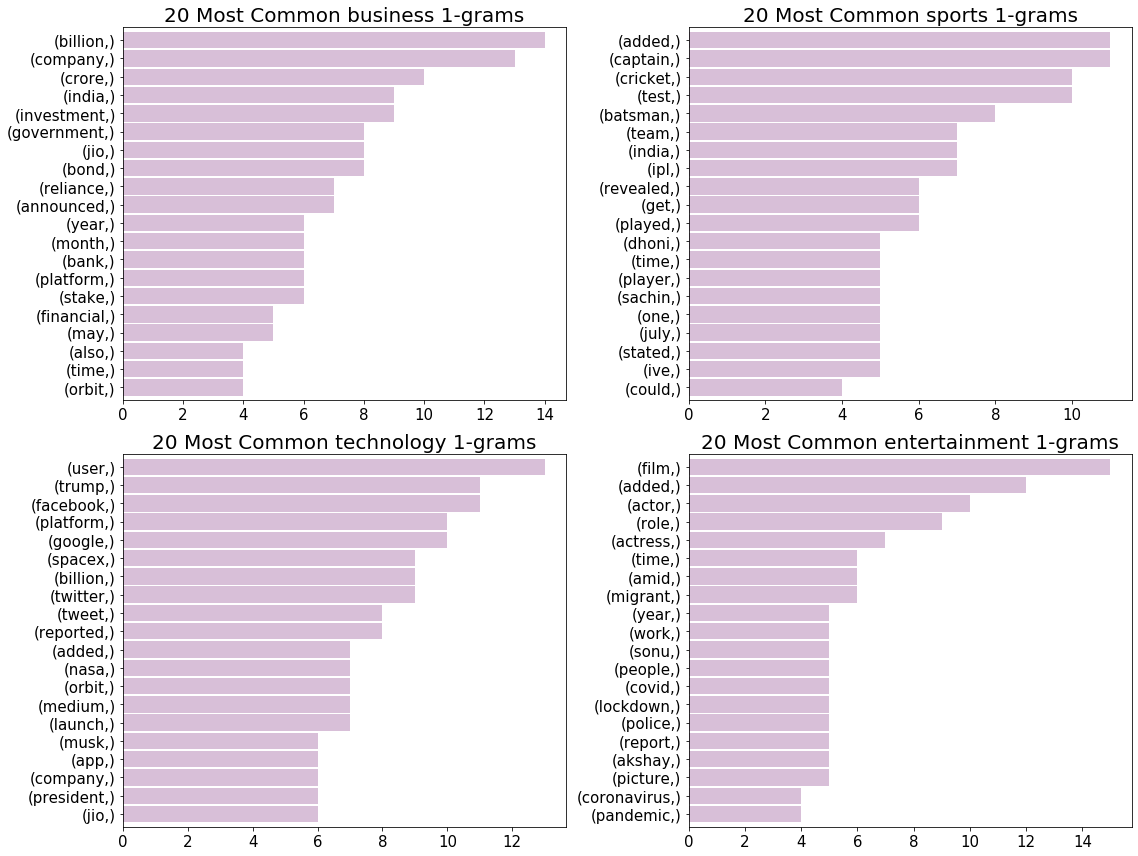

In [98]:
ngrams_compare(df_lem, 1, 'thistle')

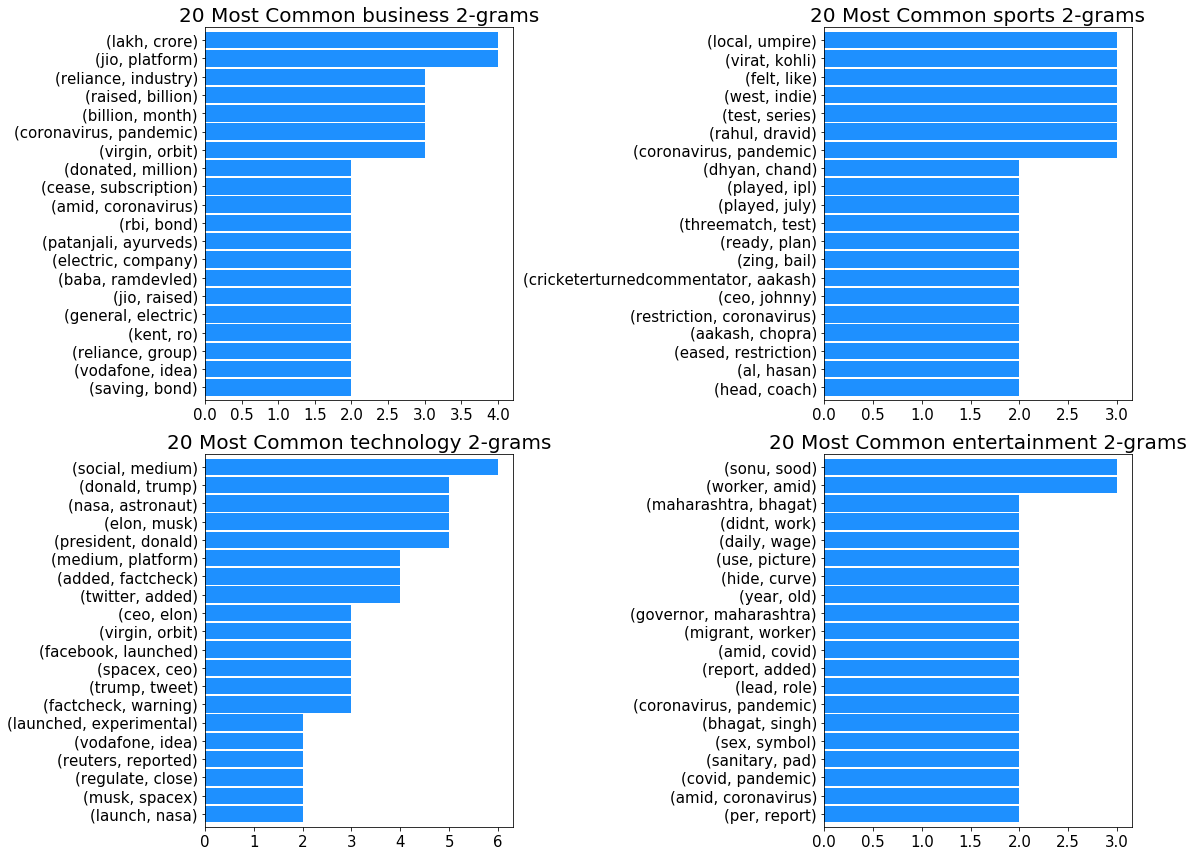

In [99]:
ngrams_compare(df_lem, 2, 'dodgerblue')

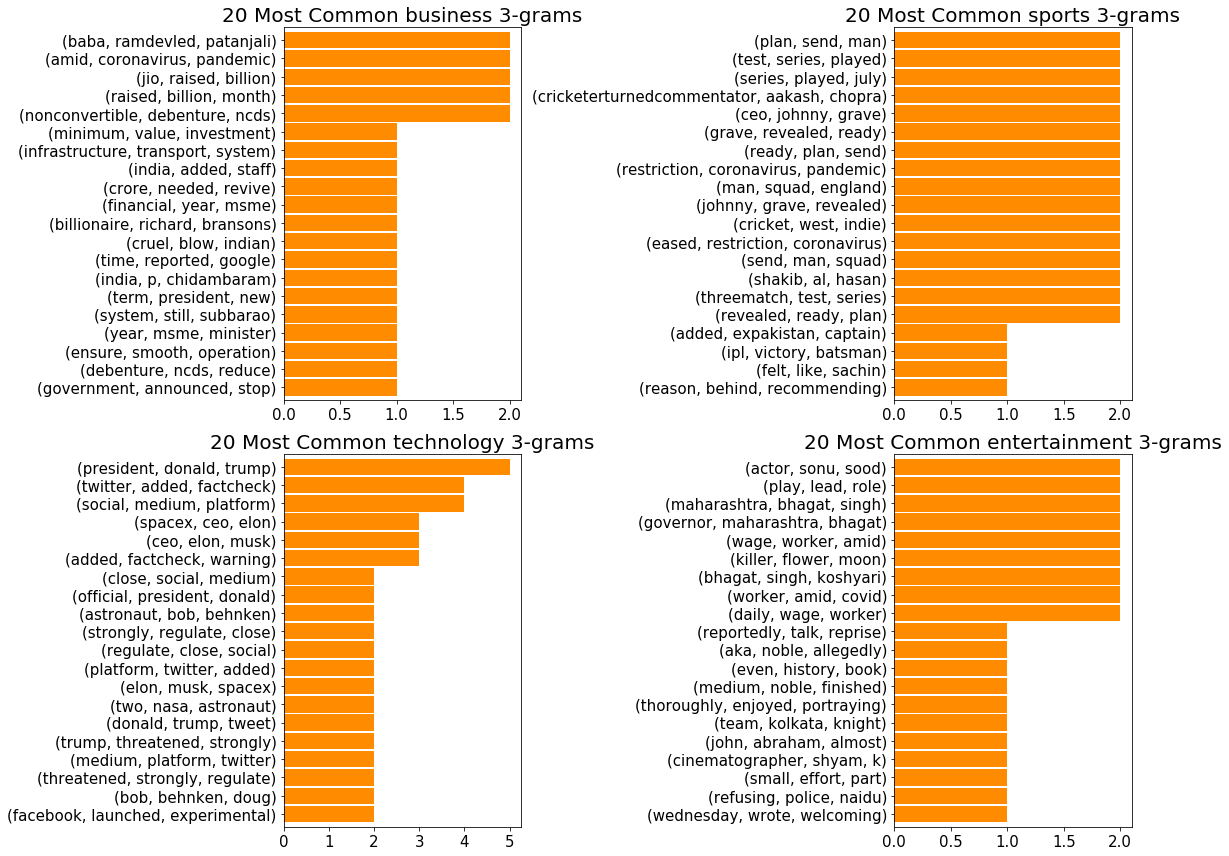

In [100]:
ngrams_compare(df_lem, 3, 'darkorange')

### Create a Series of Word Frequencies for Each Topic Label

- Here I can see that I still have words and empty strings that are adding noise to my text data. I want to remove some of this noise at this point.

Words that add nothing to the meaning:

- empty strings `''`

- said

- ha

- wa

['biotech',
 'firm',
 'novavax',
 'announced',
 'buying',
 'czech',
 'republicbased',
 'praha',
 'vaccine',
 'unit',
 'cyrus',
 'poonawalla',
 'group',
 'also',
 'owns',
 'serum',
 'institute',
 'india',
 'crore',
 'facility',
 'expected',
 'provide',
 'annual',
 'capacity',
 'billion',
 'dos',
 'antigen',
 'starting',
 'novavaxs',
 'covid',
 'vaccine',
 'candidate',
 'novavax',
 'currently',
 'product',
 'market',
 'twitter',
 'billionaire',
 'ceo',
 'jack',
 'dorsey',
 'donated',
 'million',
 'project',
 'give',
 'cash',
 'american',
 'family',
 'affected',
 'covid',
 'pandemic',
 'donor',
 'project',
 'include',
 'alphabet',
 'google',
 'ceo',
 'sundar',
 'pichai',
 'microsoft',
 'cofounder',
 'bill',
 'gate',
 'others',
 'dorsey',
 'also',
 'donated',
 'million',
 'month',
 'help',
 'prison',
 'fight',
 'covid',
 'google',
 'exploring',
 'investment',
 'vodafone',
 'idea',
 'part',
 'technology',
 'giant',
 'push',
 'india',
 'financial',
 'time',
 'reported',
 'google',
 'consider

In [105]:
# Create a list of all words from corpus from subset biz_df
business_words = ' '.join(biz_df.text).split(' ')

# Create a Series of word frequency from our list of business words
business_freq = pd.Series(business_words).value_counts()
business_freq.head()

billion       14
company       13
crore         10
india          9
investment     9
dtype: int64

In [106]:
business_freq.tail()

redeemable    1
taxable       1
explore       1
many          1
planning      1
dtype: int64

In [107]:
# Create a list of all words from corpus from subset entertainment_df
entertainment_words = ' '.join(entertainment_df.text).split(' ')

# Create a Series of word frequency from our list of entertainment words
entertainment_freq = pd.Series(entertainment_words).value_counts()
entertainment_freq.head()

film       15
added      12
actor      10
role        9
actress     7
dtype: int64

In [108]:
entertainment_freq.tail()

nonfiction    1
enjoy         1
cine          1
music         1
official      1
dtype: int64

In [109]:
# Create a list of all words from corpus from subset entertainment_df
sports_words = ' '.join(sports_df.text).split(' ')

# Create a Series of word frequency from our list of sports words
sports_freq = pd.Series(sports_words).value_counts()
sports_freq.head()

captain    11
added      11
test       10
cricket    10
batsman     8
dtype: int64

In [110]:
sports_freq.tail()

exaustralia    1
danish         1
south          1
playand        1
go             1
dtype: int64

In [112]:
# Create a list of all words from corpus from subset tech_df
tech_words = ' '.join(tech_df.text).split(' ')

# Create a Series of word frequency from our list of tech words
technology_freq = pd.Series(tech_words).value_counts()
technology_freq.head()

user        13
facebook    11
trump       11
google      10
platform    10
dtype: int64

In [113]:
technology_freq.tail()

tracker      1
put          1
letter       1
ambaniled    1
x            1
dtype: int64

In [115]:
# Create a list of all words from corpus
all_words = ' '.join(df_lem.text).split(' ')

# Create a Series of word frequency from our list of all words
all_freq = pd.Series(all_words).value_counts()
all_freq.head()

added      33
billion    23
india      22
company    19
time       18
dtype: int64

In [116]:
all_freq.tail()

software     1
operation    1
content      1
gagroo       1
dravids      1
dtype: int64

## Remove More Stopwords

In [117]:
df_lem.head()

,label,text,length
0,business,biotech firm novavax announced buying czech re...,274
1,business,twitter billionaire ceo jack dorsey donated mi...,260
2,business,google exploring investment vodafone idea part...,230
3,business,microsoft talk mukesh ambaniled reliance indus...,262
4,business,asia richest person mukesh ambanis yearold son...,245


In [121]:
def remove_stopwords(df, col, extra_words=[]):
    '''
    This function takes in a df and a string for column name, optional extra_words parameter
    if you want to add extra stopwords and returns the df with a new column 
    named 'clean' with stopwords removed.
    '''
    # Create stopword_list
    stopword_list = stopwords.words('english')
    
    # Add optional additional stopwords
    stopword_list.extend(extra_words)
    
    # Split words in column
    words = df[col].str.split()
    
    # Check each word in each row of the column against stopword_list and return only those that are not in list
    filtered_words = words.apply(lambda row: [word for word in row if word not in stopword_list])
    
    # Create new column of words that have stopwords removed
    df['clean_' + col] = filtered_words.str.join(' ')
    
    return df

In [123]:
extra_words = ['', 'ha', 'wa', 'said', 'u']
df = remove_stopwords(df_lem, 'text', extra_words=extra_words)
df.head()

,label,text,length,clean_text
0,business,biotech firm novavax announced buying czech re...,274,biotech firm novavax announced buying czech re...
1,business,twitter billionaire ceo jack dorsey donated mi...,260,twitter billionaire ceo jack dorsey donated mi...
2,business,google exploring investment vodafone idea part...,230,google exploring investment vodafone idea part...
3,business,microsoft talk mukesh ambaniled reliance indus...,262,microsoft talk mukesh ambaniled reliance indus...
4,business,asia richest person mukesh ambanis yearold son...,245,asia richest person mukesh ambanis yearold son...


### Create df of Word Frequencies for Each Subset Above

In [ ]:
word_counts = (pd.concat([business_freq, entertainment_freq, sports_freq, technology_freq, all_freq], axis=1, sort=True)
              .set_axis(['all', 'business', 'entertainment', 'sports', 'technology'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

word_counts.head()

In [ ]:
word_counts.sort_values(by='sports', ascending=False).head(20)

### Search for Topic-specific Words

In [ ]:
word_counts[word_counts.business == 0].tail()

In [ ]:
word_counts[(
            (word_counts.business == 0) & 
            (word_counts.sports == 0) &
            (word_counts.technology == 0))]

### Word Clouds!

In [ ]:
business_cloud = WordCloud(height=1000, width=1400).generate(' '.join(business_words))
technology_cloud = WordCloud(height=1000, width=1400).generate(' '.join(technology_words))

In [ ]:
plt.imshow(business_cloud)
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(technology_cloud)
plt.axis('off')
plt.show()